In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys

In [9]:
sys.path.append('/home/ahmed/class/project/semester-project/')
sys.path.append('/home/ahmed/class/project/semester-project/external/edge_boxes_python')

In [10]:
from src.utils.edge_box import get_proposal
from src.datasets.hr_wsi import HRWSI
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = 'plasma' 

In [11]:
import matplotlib.patches as patches

In [12]:
dataset = HRWSI(remote=True, username="jellouli")

Remote server password: ········


In [26]:
image, labels = next(iter(dataset))

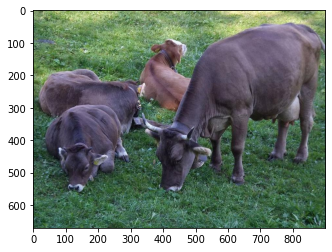

In [27]:
plt.imshow(image)

In [28]:
proposals = get_proposal(image)

In [29]:
import numpy as np 

In [30]:
proposals = get_proposal(image)

In [31]:
def convert_to_plt_rectangle(coords):
    # assumed x1 y1 x2 y2 ...
    if len(coords) > 4: 
        coords = coords[:4] 
    x1, y1, x2, y2 = coords
    return [x1, y1, x2-x1, y2-y1]

In [44]:
rect = convert_to_plt_rectangle(proposals[7])

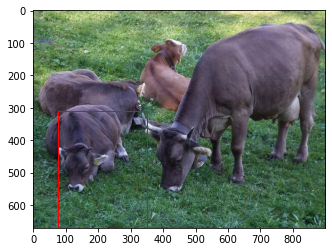

In [45]:
fig, ax = plt.subplots()

ax.imshow(image)

rect = patches.Rectangle((rect[1],rect[0]), rect[2], rect[3], linewidth=1, edgecolor='r', facecolor='none')

ax.add_patch(rect)


plt.show()